In [1]:
# replicate previous study that visualized the cell type information for mibi toff data
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
def count_celltypes(cell_data):
    value_array = cell_data['pred'].to_numpy()
    print(value_array)

    count_dict = Counter(value_array)

    count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

    for string, count in count_dict.items():
        
        print(f'{string}: {count}')
    return count_dict

    total_count = sum(count_dict.values())


In [3]:
#load data
path_cell_summary=r"D:\MIBI-TOFF\Data_For_Amos\cleaned_expression_with_both_classification_prob_spatial_27_09_23.csv"
cell_sum=pd.read_csv(path_cell_summary)
#remove columns that are not the proteins that we want as well as the numerical index of cell numbers
columns_drop=[0]+list(range(2,28))
filt_cell_sum=cell_sum.drop(columns=cell_sum.columns[columns_drop],axis=1)
print(cell_sum.head())

   Unnamed: 0  cell_size     128Te     129Xe  12C     130Xe     131Xe  \
0           0       22.0  4.772296  5.298342  0.0  4.846394  5.040530   
1           1       64.0  5.875641  5.910126  0.0  4.636036  5.830791   
2           2       75.0  5.399690  6.469769  0.0  5.041314  6.284138   
3           3       59.0  5.930317  5.874748  0.0  4.265500  5.511256   
4           4      135.0  5.957570  5.918503  0.0  4.325043  5.804698   

      132Xe     137Ba     138Ba  ...  centroid_dif  num_concavities   fov  \
0  5.465389  2.219161  2.903433  ...      0.000000              0.0  FOV2   
1  6.095266  3.337921  3.337921  ...      0.010626              0.0  FOV2   
2  6.423250  3.179785  3.814529  ...      0.005771              0.0  FOV2   
3  5.999910  3.014948  2.612470  ...      0.015455              0.0  FOV2   
4  6.006177  2.479528  3.389912  ...      0.009059              0.0  FOV2   

            pred  pred_prob         class  score        spatial  Group  \
0    DC sign Mac   0.559

In [4]:
filt_cell_sum['pred'] = filt_cell_sum['pred'].astype(str)
all_column_dtypes = filt_cell_sum['pred'].dtypes
print("Data types of all columns:")
print(all_column_dtypes)
unique_values = filt_cell_sum['pred'].unique()
print(unique_values)

Data types of all columns:
object
['DC sign Mac' 'blood vessels' 'Unidentified' 'Collagen_sma' 'B cell'
 'CD4 APC' 'CD4 T cell' 'CD20_neg_B_cells' 'SMA' 'CD8 T cell' 'Mac'
 'Collagen' 'Memory_CD4_T_Cells' 'CD206_Mac' 'Neutrophil' 'NK cell'
 'Mono_CD14_DR' 'CD11_CD11c_DCsign_DCs' 'CD68_Mac' 'Hevs' 'CD4 Treg'
 'CD14_CD11c_DCs' 'DCs' 'Follicular_Germinal_B_Cell' 'Tfh' 'Immune'
 'tumor' 'CD3 only']


In [5]:
#drop unknown and blood vessels and those counted as just immune
filt_cell_sum=filt_cell_sum[(filt_cell_sum['pred'] != 'Unidentified')].dropna()
filt_cell_sum=filt_cell_sum[(filt_cell_sum['pred'] != 'blood vessels')].dropna()
filt_cell_sum=filt_cell_sum[(filt_cell_sum['pred'] != 'Immune')].dropna()
filt_cell_sum=filt_cell_sum.dropna()
print(filt_cell_sum.shape)



(1562914, 64)


In [6]:
#trying to get the sum of each cell type
from collections import Counter
value_array = filt_cell_sum['pred'].to_numpy()
print(value_array)

count_dict = Counter(value_array)

count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

for string, count in count_dict.items():
    
    print(f'{string}: {count}')

total_count = sum(count_dict.values())
print(f'Total Count: {total_count}')
print(f'Tumor Cell ratio:',{count_dict['tumor']/total_count})

['DC sign Mac' 'Collagen_sma' 'B cell' ... 'tumor' 'tumor' 'tumor']
CD4 T cell: 491864
B cell: 319888
Memory_CD4_T_Cells: 163469
CD8 T cell: 156633
Follicular_Germinal_B_Cell: 94592
tumor: 40051
Hevs: 39939
CD20_neg_B_cells: 36075
DC sign Mac: 28117
CD4 APC: 25002
Mono_CD14_DR: 24441
Collagen_sma: 21914
CD206_Mac: 21727
CD4 Treg: 15799
SMA: 14757
Collagen: 13349
Neutrophil: 12308
Tfh: 12198
DCs: 9086
CD14_CD11c_DCs: 5995
NK cell: 5619
CD68_Mac: 4150
Mac: 3538
CD11_CD11c_DCsign_DCs: 1737
CD3 only: 666
Total Count: 1562914
Tumor Cell ratio: {0.025625850174737702}


['DC sign Mac' 'Collagen_sma' 'B cell' ... 'tumor' 'tumor' 'tumor']
CD4 T cell: 491864
B cell: 319888
Memory_CD4_T_Cells: 163469
CD8 T cell: 156633
Follicular_Germinal_B_Cell: 94592
tumor: 40051
Hevs: 39939
CD20_neg_B_cells: 36075
DC sign Mac: 28117
CD4 APC: 25002
Mono_CD14_DR: 24441
Collagen_sma: 21914
CD206_Mac: 21727
CD4 Treg: 15799
SMA: 14757
Collagen: 13349
Neutrophil: 12308
Tfh: 12198
DCs: 9086
CD14_CD11c_DCs: 5995
NK cell: 5619
CD68_Mac: 4150
Mac: 3538
CD11_CD11c_DCsign_DCs: 1737
CD3 only: 666
('CD4 T cell', 'B cell', 'Memory_CD4_T_Cells', 'CD8 T cell', 'Follicular_Germinal_B_Cell', 'tumor', 'Hevs', 'CD20_neg_B_cells', 'DC sign Mac', 'CD4 APC', 'Mono_CD14_DR', 'Collagen_sma', 'CD206_Mac', 'CD4 Treg', 'SMA', 'Collagen', 'Neutrophil', 'Tfh', 'DCs', 'CD14_CD11c_DCs', 'NK cell', 'CD68_Mac', 'Mac', 'CD11_CD11c_DCsign_DCs', 'CD3 only')
(491864, 319888, 163469, 156633, 94592, 40051, 39939, 36075, 28117, 25002, 24441, 21914, 21727, 15799, 14757, 13349, 12308, 12198, 9086, 5995, 5619, 41

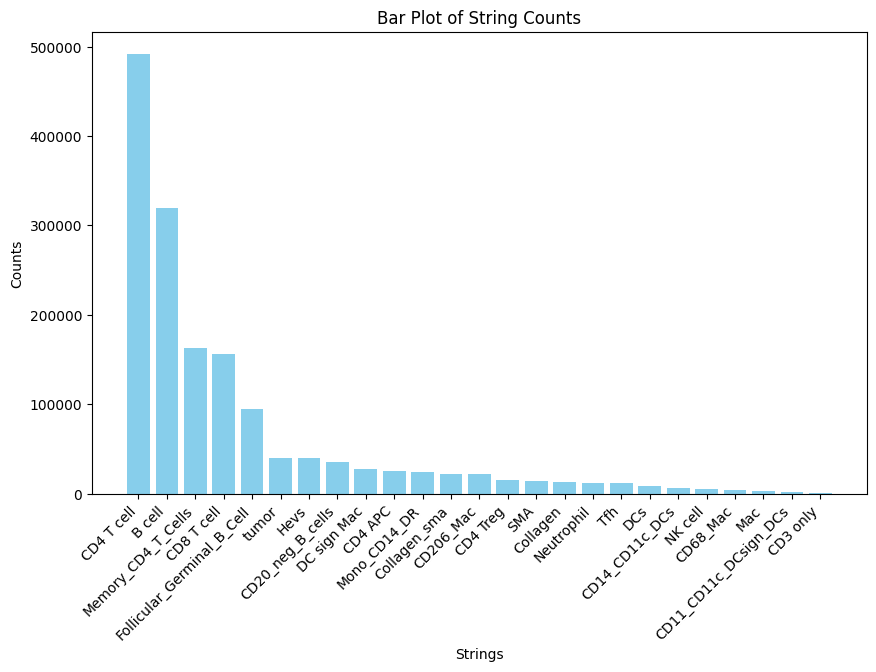

In [7]:
count_dict=count_celltypes(filt_cell_sum)
strings, counts = zip(*count_dict.items())
print(strings)
print(counts)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(strings, counts, color='skyblue')
plt.xlabel('Strings')
plt.ylabel('Counts')
plt.title('Bar Plot of String Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [8]:
#varify tumor count
#value_array = filt_cell_sum['class'].to_numpy()
#print(value_array)

#count_dict = Counter(value_array)

#count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

##    print(f'{string}: {count}')

#total_count = sum(count_dict.values())
#print(f'Total Count: {total_count}')

#print(f'Tumor Cell ratio:',{count_dict['tumor']/total_count})


In [9]:
group_mapping = {
    'CD4 T cell': 'CD4',
    'Memory_CD4_T_Cells': 'CD4',
    'CD8 T cell': 'CD8',
    'CD4 APC': 'CD4',
    'CD4 Treg': 'CD4',
    'CD3 only': 'CD3',
    'B cell': 'B Cells',
    'Follicular_Germinal_B_Cell': 'B Cells',
    'CD20_neg_B_cells': 'B Cells',
    'DC sign Mac': 'Macrophages',
    'CD206_Mac': 'Macrophages',
    'CD68_Mac': 'Macrophages',
    'Mac': 'Macrophages',
    'DCs': 'Dendritic Cells',
    'CD14_CD11c_DCs': 'Dendritic Cells',
    'CD11_CD11c_DCsign_DCs': 'Dendritic Cells',
    'Mono_CD14_DR': 'Monocytes',
    'tumor': 'tumor',
    'Hevs': 'Other',
    'Collagen_sma': 'Other',
    'SMA': 'Other',
    'Collagen': 'Other',
    'Neutrophil': 'Other',
    'Tfh': 'Other',
    'NK cell': 'Other',
}
filt_cell_sum['pred'] = filt_cell_sum['pred'].replace(group_mapping)


['Macrophages' 'Other' 'B Cells' ... 'tumor' 'tumor' 'tumor']
CD4: 696134
B Cells: 450555
CD8: 156633
Other: 120084
Macrophages: 57532
tumor: 40051
Monocytes: 24441
Dendritic Cells: 16818
CD3: 666
('CD4', 'B Cells', 'CD8', 'Other', 'Macrophages', 'tumor', 'Monocytes', 'Dendritic Cells', 'CD3')
(696134, 450555, 156633, 120084, 57532, 40051, 24441, 16818, 666)


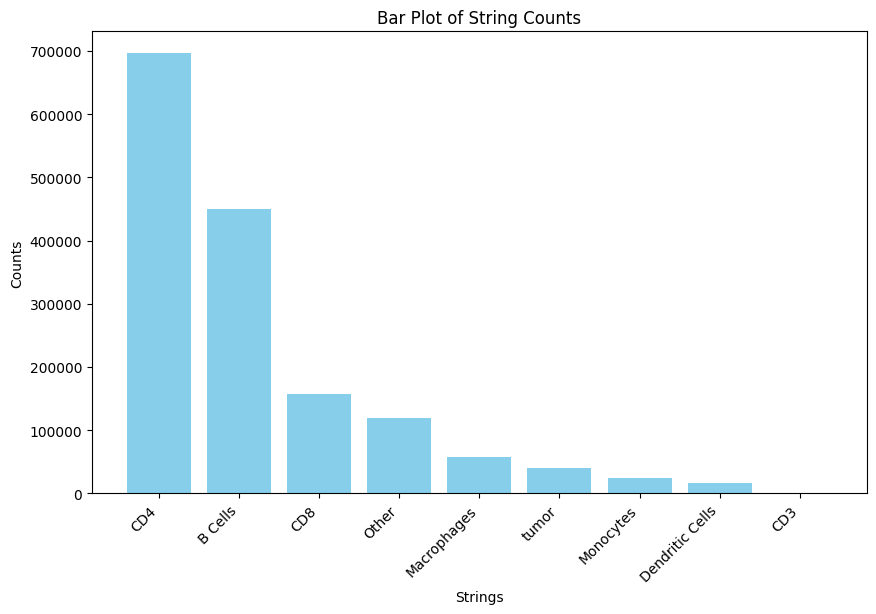

In [10]:
count_dict=count_celltypes(filt_cell_sum)
strings, counts = zip(*count_dict.items())
print(strings)
print(counts)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(strings, counts, color='skyblue')
plt.xlabel('Strings')
plt.ylabel('Counts')
plt.title('Bar Plot of String Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [11]:

#Split across all dat versions
X = filt_cell_sum.drop('pred', axis=1)  # Features
y = filt_cell_sum[['pred']]  # Labels
print(X.head())
X_columns_drop = list(range(40, X.shape[1]))#These numbers are determined from the spread sheet after removing everything we wont use
X.drop(columns=X.columns[X_columns_drop], axis=1, inplace=True)
print(X.head())
print(y.head())


   cell_size  Alexa Fluor 488  Bax  CCR7  CD11c  CD14  CD163      CD20  CD206  \
0       22.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   
3       59.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   
4      135.0              0.0  0.0   0.0    0.0   0.0    0.0  3.689504    0.0   
5      139.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   
6      122.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   

   CD21  ...  convex_hull_resid  centroid_dif  num_concavities   fov  \
0   0.0  ...           0.000000      0.000000              0.0  FOV2   
3   0.0  ...           0.032787      0.015455              0.0  FOV2   
4   0.0  ...           0.028777      0.009059              0.0  FOV2   
5   0.0  ...           0.034722      0.007883              0.0  FOV2   
6   0.0  ...           0.008130      0.004532              0.0  FOV2   

   pred_prob   class  score        spatial  Group  patient number  
0   0.559885

Text(0.5, 0.92, '3D Scatter Plot with PCA')

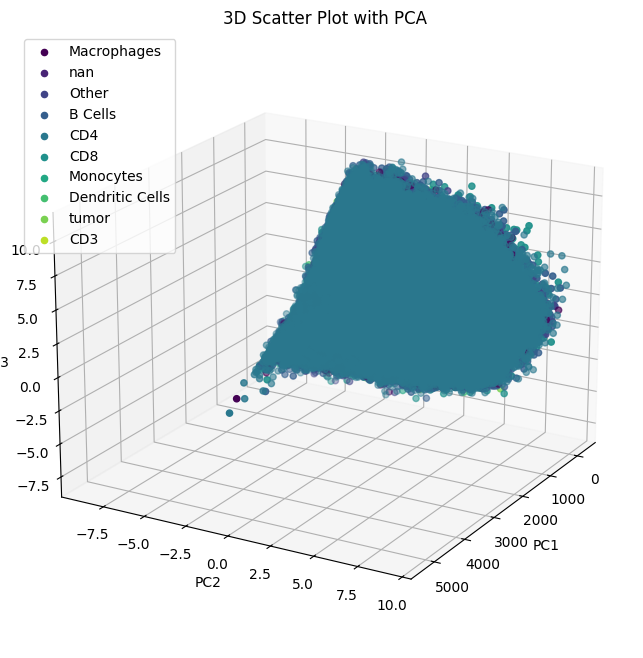

In [12]:
#Simple PCA analysis clearly to many variables and cell types to get a meaningful results. 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)


df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['pred'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('viridis') 

unique_categories = df_pca['pred'].unique()
colors = [cmap(i / len(unique_categories)) for i in range(len(unique_categories))]

for category, color in zip(unique_categories, colors):
    indices = df_pca['pred'] == category
    ax.scatter(
        df_pca.loc[indices, 'PC1'],
        df_pca.loc[indices, 'PC2'],
        df_pca.loc[indices, 'PC3'],
        c=[color],
        label=category
    )

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
ax.view_init(elev=20, azim=30)

plt.title('3D Scatter Plot with PCA')
#plt.show()

###################################################

In [13]:
pd.set_option('display.max_columns', None)
filt_expression_sum= filt_cell_sum.drop('pred', axis=1)  # Features
cell_type = filt_cell_sum.loc[:,['fov','pred','Group','patient number']]  # Labels

columns_drop = list(range(40, filt_expression_sum.shape[1]))#These numbers are determined from the spread sheet after removing everything we wont use
filt_expression_sum.drop(columns=filt_expression_sum.columns[columns_drop], axis=1, inplace=True)
cell_processed= pd.merge(filt_expression_sum, cell_type, left_index=True, right_index=True, how='inner')
print(cell_processed.head(5))

   cell_size  Alexa Fluor 488  Bax  CCR7  CD11c  CD14  CD163      CD20  CD206  \
0       22.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   
3       59.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   
4      135.0              0.0  0.0   0.0    0.0   0.0    0.0  3.689504    0.0   
5      139.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   
6      122.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   

   CD21       CD3      CD31  CD4      CD45    CD45RA  CD45RO  CD56  CD68  \
0   0.0  0.000000  5.203037  0.0  0.000000  0.000000     0.0   0.0   0.0   
3   0.0  0.000000  0.000000  0.0  0.000000  0.000000     0.0   0.0   0.0   
4   0.0  0.000000  0.000000  0.0  3.794746  0.685723     0.0   0.0   0.0   
5   0.0  0.000000  0.000000  0.0  4.276060  0.000000     0.0   0.0   0.0   
6   0.0  3.328795  0.000000  0.0  5.069047  0.000000     0.0   0.0   0.0   

   CD69       CD8    COL1A1   DC-SIGN  Foxp3  Granzyme B

In [14]:
result_df_list = []

meta_columns = ['fov', 'Group', 'patient number', 'pred']

result_df_list.append(cell_processed[meta_columns])

for column in cell_processed.columns.difference(['fov', 'Group', 'patient number', 'pred']):
    # Group by all relevant columns and compute mean, std, and sum

    stats_df = cell_processed.groupby(['fov', 'Group', 'patient number','pred'])[column].agg(['mean', 'std', 'sum']).reset_index()
    print(stats_df)
    #stats_df.drop(columns=['fov', 'Group', 'patient number','pred'],inplace=True)
    stats_df.columns = ['fov', 'Group', 'patient number','pred',f'{column}_mean', f'{column}_std', f'{column}_sum']

    

    result_df_list.append(stats_df)


# Concatenate the individual DataFrames into a single result DataFrame
result_df = pd.concat(result_df_list, axis=1)
print(result_df.head())
print(result_df.shape)
result_df.to_csv('test_result.csv')


        fov Group  patient number             pred      mean       std  \
0     FOV10    G1               3          B Cells  0.025832  0.271404   
1     FOV10    G1               3              CD4  0.023080  0.256912   
2     FOV10    G1               3              CD8  0.058477  0.429561   
3     FOV10    G1               3  Dendritic Cells  0.000000  0.000000   
4     FOV10    G1               3      Macrophages  0.000000  0.000000   
...     ...   ...             ...              ...       ...       ...   
1344  FOV98    G4             104  Dendritic Cells  0.008238  0.125213   
1345  FOV98    G4             104      Macrophages  0.053136  0.378878   
1346  FOV98    G4             104        Monocytes  0.000000  0.000000   
1347  FOV98    G4             104            Other  0.007115  0.118470   
1348  FOV98    G4             104            tumor  0.053735  0.354657   

             sum  
0     104.438404  
1     128.832557  
2      68.886320  
3       0.000000  
4       0.000000